<a href="https://colab.research.google.com/github/rishabhbhardwaj-rb/FakeNewsDetection/blob/main/Notebooks/CleaningDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mounting Goggle Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Import Packages**

In [ ]:
import numpy as np
import pandas as pd

### *POLITIFACT Dataset*

In [ ]:
File = '/content/drive/MyDrive/FNDS/Dataset/POLITIFACT/politifact.zip'
dataset = pd.read_csv(File, encoding='utf-8')

##Renaming columns
dataset.rename(columns={'fact':'label','curator_complete_article':'content'},inplace=True)

##Dropping unneccessary columns from the dataset
remove_columns = dataset.columns.values.tolist()
remove_columns.remove('label')
remove_columns.remove('content')
dataset.drop(remove_columns,inplace=True, axis=1)

##Dropping rows with unwanted labels from the dataset
dataset = dataset[dataset['label']!='full-flop']
dataset = dataset[dataset['label']!='no-flip']
dataset = dataset[dataset['label']!='half-flip']

##Dropping rows with NaN values from the dataset
dataset = dataset[dataset['content'].notna()]

##0-->Fake News, 1-->Real News
label_dic = {
            "true" : 1,
            "mostly-true" : 1,
            "half-true" : 1,
            "barely-true" : 0,
            "false" : 0,
            "pants-fire" : 0
        }
dataset['label'] = dataset['label'].map(label_dic)

dataset.reset_index(inplace=True)
dataset.drop(['index'],inplace=True,axis=1)

dataset.to_csv('/content/drive/MyDrive/FNDS/Dataset/CleanedDataset/Dataset_Clean.zip',encoding='utf-8',index=False)

dataset.head()

,label,content
0,0,\nBack in July a Japanese amusement park drew ...
1,0,\nA recent Facebook post uses a video clip of ...
2,1,"\n""If you look at the average teacher pay comp..."
3,0,\nA popular TikTok video said that if you want...
4,1,\nAfter failing to stop the $1.9 trillion COVI...


In [ ]:
dataset.describe()

,label
count,19105.000000
mean,0.473070
std,0.499287
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
File = '/content/drive/MyDrive/FNDS/Dataset/CleanedDataset/Dataset_Clean.zip'
dataset = pd.read_csv(File, encoding='utf-8')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6daa6f01f0>]],
      dtype=object)

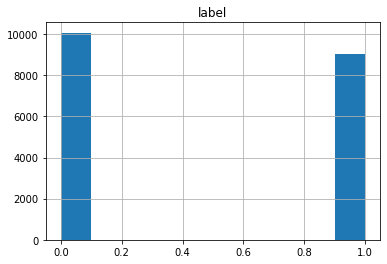